<img src="https://i.ibb.co/k1jrqqc/NA.png" style="float: left; margin: 20px; height: 55px; border-radius:50%;">

# IMAGE PROCESSING: `Eye Disease Prediction`

_Author: Naresh V

----

## Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.preprocessing.image import load_img, save_img, img_to_array
from tensorflow.keras.utils import normalize
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
import numpy as np
from os import listdir
import matplotlib.pyplot as plt
import gc
np.random.seed(42)

## Importing Datasets

In [2]:
categories = ['cataracts', 'glaucoma', 'normal', 'retinopathy']

In [3]:
# To resize and normalize the image data
def process(data, path):
    try:
        #loading image and resizing it
        img = load_img(path+data, target_size=(512, 512))
        
        #to convert image to array
        img_arr = img_to_array(img)/512
        
        #to normalize the array
        img_arr = normalize(img_arr)
        
        return img_arr
    except:
            print(f'Error for file: {data}')
    pass


In [4]:
def read_data():
    # path of the required dataset folders
    path = 'datasets/'
    
    # To store the image data w.r.t the categories
    data = {}
    
    # To instantiate X, y
    X = []
    y = []
    i = 0

    # To iterate through each category
    for category in categories:
        
        print(f'processing...{category}',end='')
        
        # To get the name of the folder
        folder = category.lower()
        
        # Path of the dataset folder
        data_path = path+f'{folder}/'
        
        # To Make a list of processed image data
        X += [ process(file,data_path) for file in listdir(data_path)[:5]]
        y += [i] * len(listdir(data_path)[:5])
        i += 1
        
        print(f'\r{category} data processed!')
        
    # To freeup memory    
    del data
    gc.collect()
    return X,y

## Setting X and y

In [5]:
X, y = read_data()

cataracts data processed!
glaucoma data processed!
normal data processed!
retinopathy data processed!


In [6]:
# To convert X,y to numpy array
X = np.array(X)
y = np.array(y)
print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')

X shape: (20, 512, 512, 3)
y shape: (20,)


In [7]:
gc.collect()

40

## Train-Test Split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [9]:
del X
del y
gc.collect()

40

## CNN Model

In [10]:
# To instantiatea Sequential model 
model = Sequential()

# To add a Convolutional 2D layer which creates 16 3x3 filters to detect image features.
model.add(Conv2D(16, (3,3), activation='relu', input_shape=(512,512,3)))

# To add a MaxPooling 2D layer which takes the maximum value in every 2x2 grid
model.add(MaxPooling2D(pool_size=(2,2)))

# To increase the filters to 32
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

# To increase the filters to 64
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

# To bridge between the convolutional layers and the dense layers
model.add(Flatten())

# To analyzes the features that were identified in the convolutional layers 
model.add(Dense(256, activation='relu'))

# To add the output layer
model.add(Dense(4, activation='softmax'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 510, 510, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 255, 255, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 253, 253, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 126, 126, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 124, 124, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 246016)            0

In [13]:
# To compile the model
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [14]:
# To fit the model and save it as history
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), batch_size=64, epochs=30)

Train on 15 samples, validate on 5 samples
Epoch 1/30
15/15 [==============================] - 52s 3s/sample - loss: 1.3846 - acc: 0.2667 - val_loss: 32.5937 - val_acc: 0.2000
Epoch 2/30
15/15 [==============================] - 30s 2s/sample - loss: 31.0980 - acc: 0.2667 - val_loss: 4.3510 - val_acc: 0.6000
Epoch 3/30
15/15 [==============================] - 9s 607ms/sample - loss: 5.5942 - acc: 0.4000 - val_loss: 5.6211 - val_acc: 0.4000
Epoch 4/30
15/15 [==============================] - 4s 266ms/sample - loss: 4.5005 - acc: 0.4000 - val_loss: 3.8132 - val_acc: 0.4000
Epoch 5/30
15/15 [==============================] - 3s 226ms/sample - loss: 3.1281 - acc: 0.5333 - val_loss: 1.2727 - val_acc: 0.6000
Epoch 6/30
15/15 [==============================] - 5s 322ms/sample - loss: 0.5767 - acc: 0.8000 - val_loss: 0.9190 - val_acc: 0.6000
Epoch 7/30
15/15 [==============================] - 3s 231ms/sample - loss: 0.3746 - acc: 0.8667 - val_loss: 0.2559 - val_acc: 1.0000
Epoch 8/30
15/15 [===

## Visualization - model's performance

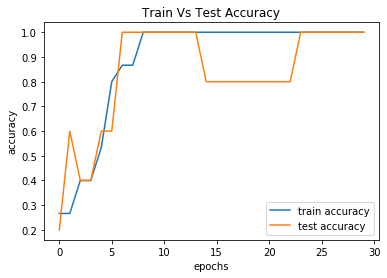

In [17]:
plt.plot(history.history['acc'], label='train accuracy')
plt.plot(history.history['val_acc'], label='test accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Train Vs Test Accuracy')
plt.legend();

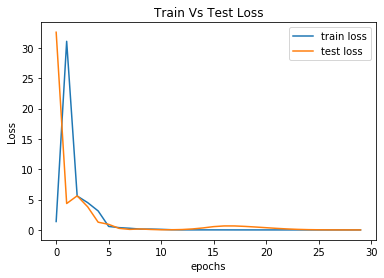

In [18]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='test loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.title('Train Vs Test Loss')
plt.legend();